## Implementing simple chatbot using langgraph 

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [3]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [5]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

/Users/udayvenkatesha/anaconda3/envs/agent/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a0e9480a2f', 'id': 'chatcmpl-D0KoFrNZi8elopnLLx3z3EP37EM1M', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bdef8-1f70-77c1-9d36-e6e95d863806-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="openai/gpt-oss-safeguard-20b")
llm_groq.invoke("Hey I am Uday and i like to play cricket")

AIMessage(content='Hey Uday! 👋 Cricket’s a fantastic sport—there’s always something new to learn or a skill to sharpen. Are you a batsman, bowler, or more of a fielding enthusiast? Or maybe you’re a big fan of a particular team or player? Let me know what you’re most into, and we can chat about tactics, stats, or even some fun trivia!', additional_kwargs={'reasoning_content': 'User: "Hey I am Uday and i like to play cricket". We need to respond. The user says they like to play cricket. We can ask about preferences, maybe ask what level, what role, etc. Or just respond friendly. The user hasn\'t asked a question. We can respond with something like "Nice to meet you, Uday! Cricket is great. Do you have a favorite team or player? Are you into any particular aspect?".\n\nWe can also ask if they\'d like to talk about cricket or something else. But we should keep in mind the system message: "You are a helpful assistant...". So respond accordingly.\n\nWe can also provide some cricket related 

### We Will start With Creating Nodes

In [9]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

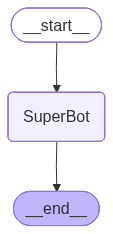

In [10]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [12]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is UDAY And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is UDAY And I like cricket', additional_kwargs={}, response_metadata={}, id='3bfc55c9-8815-4d98-ac2d-0f13147b43cc'),
  AIMessage(content='Hey UDAY! 👋 It’s great to meet a fellow cricket fan. Which teams or players are your favorites? Or maybe there’s a recent match you’re excited about? I’m all ears!', additional_kwargs={'reasoning_content': 'The user says: "Hi,My name is UDAY And I like cricket". We need to respond appropriately. Also we must adhere to guidelines: we can ask clarifying questions? The user is just greeting. So respond friendly, maybe ask about cricket preferences. Also maybe mention we are an AI. We can say "Hello UDAY, nice to meet you. Which cricket teams or players do you like?" Let\'s do that. Also we might ask if they\'d like to discuss cricket stats or something. The user might want a conversation. So respond.'}, response_metadata={'token_usage': {'completion_tokens': 162, 'prompt_tokens': 82, 'total_tokens': 244, 'c

#### Streaming The responses

In [13]:
for event in graph_builder.stream({"messages":"Hello My name is UDAY"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content='Hello Uday! 👋 How can I help you today?', additional_kwargs={'reasoning_content': 'The user says "Hello My name is UDAY". We should respond accordingly. Probably greet them. Use friendly tone. Ask about what they need.'}, response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 77, 'total_tokens': 130, 'completion_time': 0.05192476, 'completion_tokens_details': {'reasoning_tokens': 31}, 'prompt_time': 0.006279677, 'prompt_tokens_details': None, 'queue_time': 0.00247124, 'total_time': 0.058204437}, 'model_name': 'openai/gpt-oss-safeguard-20b', 'system_fingerprint': 'fp_e3febdc4be', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bdf08-745a-7980-9245-f8cbb3a23a2f-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 77, 'output_tokens': 53, 'total_tokens': 130, 'output_token_details': {'reasoning': 31}})]}}
